In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata = "Resources/mouse_metadata.csv"
study_results = "Resources/study_results.csv"

# Read the mouse data results
mouse_metadata = pd.read_csv(mouse_metadata)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21.0,16.0
1,s185,Capomulin,Female,3.0,17.0
2,x401,Capomulin,Female,16.0,15.0
3,m601,Capomulin,Male,22.0,17.0
4,g791,Ramicane,Male,11.0,16.0


In [2]:
# Read the study results
study_results = pd.read_csv(study_results)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset
combined_dataset_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview
combined_dataset_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21.0,16.0,0.0,45.000000,0.0
1,k403,Ramicane,Male,21.0,16.0,5.0,38.825898,0.0
2,k403,Ramicane,Male,21.0,16.0,10.0,35.014271,1.0
3,k403,Ramicane,Male,21.0,16.0,15.0,34.223992,1.0
4,k403,Ramicane,Male,21.0,16.0,20.0,32.997729,1.0


In [4]:
# Checking the number of mice.
mice_count = combined_dataset_df["Mouse ID"].nunique()
mice_count

250

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice_ID = combined_dataset_df.loc[combined_dataset_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_df = combined_dataset_df.loc[combined_dataset_df["Mouse ID"] == "g989", :]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21.0,26.0,0.0,45.000000,0.0
909,g989,Propriva,Female,21.0,26.0,0.0,45.000000,0.0
910,g989,Propriva,Female,21.0,26.0,5.0,48.786801,0.0
911,g989,Propriva,Female,21.0,26.0,5.0,47.570392,0.0
912,g989,Propriva,Female,21.0,26.0,10.0,51.745156,0.0
913,g989,Propriva,Female,21.0,26.0,10.0,49.880528,0.0
914,g989,Propriva,Female,21.0,26.0,15.0,51.325852,1.0
915,g989,Propriva,Female,21.0,26.0,15.0,53.442020,0.0
916,g989,Propriva,Female,21.0,26.0,20.0,55.326122,1.0
917,g989,Propriva,Female,21.0,26.0,20.0,54.657650,1.0


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataset_df = combined_dataset_df[combined_dataset_df['Mouse ID'].isin(duplicate_mice_ID)==False]
clean_dataset_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21.0,16.0,0.0,45.000000,0.0
1,k403,Ramicane,Male,21.0,16.0,5.0,38.825898,0.0
2,k403,Ramicane,Male,21.0,16.0,10.0,35.014271,1.0
3,k403,Ramicane,Male,21.0,16.0,15.0,34.223992,1.0
4,k403,Ramicane,Male,21.0,16.0,20.0,32.997729,1.0


In [8]:
# Checking the number of mice in the clean DataFrame.
num_clean_mice = clean_dataset_df["Mouse ID"].nunique()
num_clean_mice

249

In [9]:
# SUMMARY STATISTICS

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume.

mean = clean_dataset_df['Tumor Volume (mm3)'].groupby(clean_dataset_df['Drug Regimen']).mean()
median = clean_dataset_df['Tumor Volume (mm3)'].groupby(clean_dataset_df['Drug Regimen']).median()
var = clean_dataset_df['Tumor Volume (mm3)'].groupby(clean_dataset_df['Drug Regimen']).var()
std = clean_dataset_df['Tumor Volume (mm3)'].groupby(clean_dataset_df['Drug Regimen']).std()
sem = clean_dataset_df['Tumor Volume (mm3)'].groupby(clean_dataset_df['Drug Regimen']).sem()

summary_stats = pd.DataFrame({"Mean ofTumor Voume":mean,
                             "Median of Tumor Volume":median,
                             "Variance of Tumor Volume":var,
                             "Std of Tumor Volume":std,
                             "Sem of Tumor Volume":sem})

summary_stats



,Mean ofTumor Voume,Median of Tumor Volume,Variance of Tumor Volume,Std of Tumor Volume,Sem of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats_agg = clean_dataset_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats_agg




Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [11]:
#BAR AND PIE CHARTS

# Create a list of value counts based on Drug Regimen column and from the total count of data points in each Drug Regimen

num_mice = clean_dataset_df["Drug Regimen"].value_counts()
num_mice


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0.5, 1.0, 'Number of Mice per Treatment')

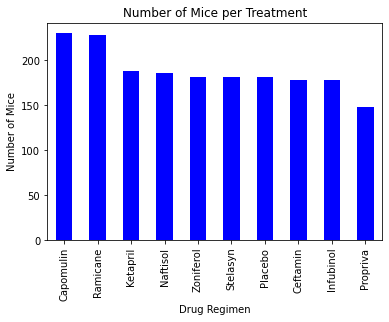

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

bar_plot_pandas = num_mice.plot.bar(color='b')

#Set the xlabel, ylabel, and title to display on the bar plot
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

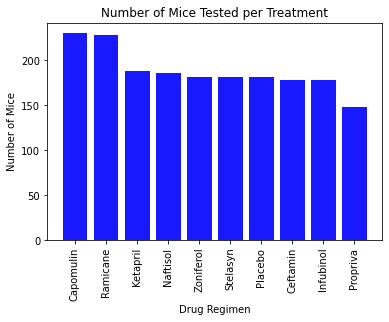

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_label = num_mice.index.values
y_label = num_mice.values

#Creaate a bar plot using pyplot based off the list of value counts
plt.bar(x_label, y_label, color='b', alpha=0.9, align='center')

#Set the xlabel and ylabel, title to display on the bar plot
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice Tested per Treatment")
plt.xticks(rotation="vertical")

plt.show()


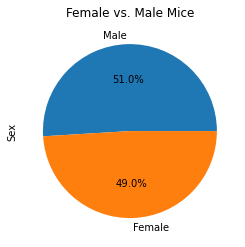

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_data = clean_dataset_df["Sex"].value_counts()
plt.title("Female vs. Male Mice")
gender_data.plot.pie(autopct="%1.1f%%")
plt.show()

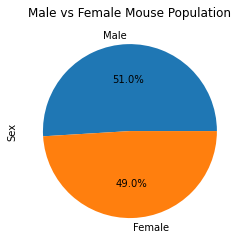

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ['Female', 'Male']
size = [49.80, 50.20]
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.show()


In [16]:
# QUARTILES, OUTLIERS AND BOXPLOTS

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = clean_dataset_df.loc[clean_dataset_df["Drug Regimen"] == "Capomulin", : ]
Ramicane_df = clean_dataset_df.loc[clean_dataset_df["Drug Regimen"] == "Ramicane", : ]
Infubinol_df = clean_dataset_df.loc[clean_dataset_df["Drug Regimen"] == "Infubinol", : ]
Ceftamin_df = clean_dataset_df.loc[clean_dataset_df["Drug Regimen"] == "Ceftamin", : ]


In [17]:
# Start by getting the last (greatest) timepoint for each mouse
# Display the Loower Quartile, Upper Quartile, Interquartile Range, Median and Outliers
# Capomulin quartiles and IQR 

Capomulin_last_timepoint = Capomulin_df.groupby('Mouse ID').max()["Timepoint"]
Capomulin_volume = pd.DataFrame(Capomulin_last_timepoint)
Capomulin_merge = pd.merge(Capomulin_volume, clean_dataset_df, on=("Mouse ID","Timepoint"), how="left")
Capomulin_merge.head()

Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles = Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outlers.")
      

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outlers.


In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

Ramicane_last_timepoint = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_volume = pd.DataFrame(Ramicane_last_timepoint)
Ramicane_merge = pd.merge(Ramicane_volume, clean_dataset_df, on=("Mouse ID","Timepoint"), how="left")
Ramicane_merge.head()
Ramicane_merge.to_csv("Output.csv")
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles = Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane tumors: {lowerq}")
print(f"The upper quartile of Ramicane tumors: {upperq}")
print(f"The interquartile range of Ramicane tumors: {iqr}")
print(f"The median of Ramicane tumors: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outlers.")

The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
The median of Ramicane tumors: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outlers.


In [19]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Infubinol Regimen

Infubinol_last_timepoint = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_volume = pd.DataFrame(Infubinol_last_timepoint)
Infubinol_merge = pd.merge(Infubinol_volume, clean_dataset_df, on =("Mouse ID","Timepoint"), how="left")
Infubinol_merge.to_csv("output.csv")
Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45.0,Infubinol,Female,20.0,23.0,67.973419,2.0
1,a251,45.0,Infubinol,Female,21.0,25.0,65.525743,1.0
2,a577,30.0,Infubinol,Female,6.0,25.0,57.031862,2.0
3,a685,45.0,Infubinol,Male,8.0,30.0,66.083066,3.0
4,c139,45.0,Infubinol,Male,11.0,28.0,72.226731,2.0


In [20]:
# Determine outliers using upper and lower bounds
# Infubinol Regimen quartiles and IQR

Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles = Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol tumors: {lowerq}")
print(f"The upper quartile of Infubinol tumors: {upperq}")
print(f"The interquartile range of Infubinol tumors: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    

The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinol tumors: 65.52574285
The interquartile range of Infubinol tumors: 11.477135160000003
The median of Infubinol tumors is: 60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [21]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Ceftamin Regimen

Ceftamin_last_timepoint = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_volume = pd.DataFrame(Ceftamin_last_timepoint)
Ceftamin_merge = pd.merge(Ceftamin_volume, clean_dataset_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45.0,Ceftamin,Female,20.0,28.0,62.999356,3.0
1,b447,0.0,Ceftamin,Male,2.0,30.0,45.000000,0.0
2,b487,25.0,Ceftamin,Female,6.0,28.0,56.057749,1.0
3,b759,30.0,Ceftamin,Female,12.0,25.0,55.742829,1.0
4,f436,15.0,Ceftamin,Female,3.0,25.0,48.722078,2.0


In [22]:
# Determine outliers using upper and lower bounds
# Ceftamin quartiles and IQR

Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin tumors: {lowerq}")
print(f"The upper quartile of Ceftamin tumors: {upperq}")
print(f"The interquartile range of Ceftamin tumors: {iqr}")
print(f"The median of Ceftamin tumors is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin tumors: 48.72207785
The upper quartile of Ceftamin tumors: 64.29983003
The interquartile range of Ceftamin tumors: 15.577752179999997
The median of Ceftamin tumors is: 59.85195552
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


NameError: name 'box_plot' is not defined

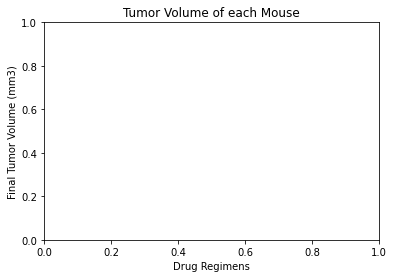

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

tumors_box_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of each Mouse')
ax1.set_xlabel('Drug Regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(box_plot, labels=Regimen, widths=0.5, vert=True)
plt.show()

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

drugs_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = combined_dataset_df[combined_dataset_df["Drug Regimen"].isin(drugs_list)]
drugs.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21.0,16.0,0.0,45.000000,0.0
1,k403,Ramicane,Male,21.0,16.0,5.0,38.825898,0.0
2,k403,Ramicane,Male,21.0,16.0,10.0,35.014271,1.0
3,k403,Ramicane,Male,21.0,16.0,15.0,34.223992,1.0
4,k403,Ramicane,Male,21.0,16.0,20.0,32.997729,1.0


In [28]:
# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size =("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for drugs in drugs_list:
    print(drugs)


Capomulin
Ramicane
Infubinol
Ceftamin


In [29]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

treatments = 0
for drugs in drugs_list:
    quartiles = last_timepoint[drugs].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    if treatments == 0:
        print(f"----------------------------------------------------------------")
        print(f"THe upper quartile of {drugs} treatments is: {lowerq}")
        print(f"The upper quartile of {drugs} treatments is: {upperq}")
        print(f"The interquartile range of {drugs} treatments is: {iqr}")
        print(f"Values below {lower_bound} could be {drugs} outliers.")
        
    

----------------------------------------------------------------
THe upper quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
----------------------------------------------------------------
THe upper quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
----------------------------------------------------------------
THe upper quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
----------------------------------------------------------------
THe upper quartile of Ceftamin treatments is: 48.72
The upper quartile of Ceftamin treatments is: 64.3
The inte

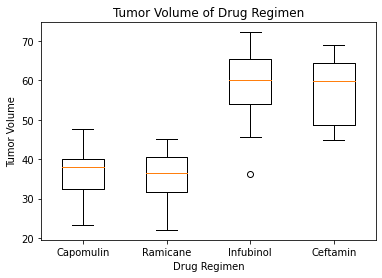

In [30]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

drugs_box_plot_list = []
for drugs in drugs_list:
    drugs_box_plot_list.append(list(last_timepoint[drugs].dropna()))
    
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume')
ax1.set_title('Tumor Volume of Drug Regimen')
ax1.boxplot(drugs_box_plot_list, labels=Regimen, widths=0.5, vert=True)
plt.show()

Text(0, 0.5, 'Tumor Volume (mm3)')

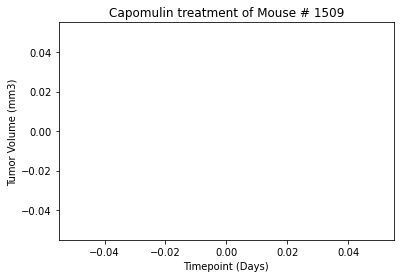

In [36]:
# lINE AND SCATTER PLOTS
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

lineplot_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "1509",:]
lineplot_df.head()
x_axis = lineplot_df["Timepoint"]
tumor_size = lineplot_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatment of Mouse # 1509')
plt.plot(x_axis, tumor_size, linewidth=2, markersize=20, marker="o", color="red", label="Fahrenheit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')


Text(0, 0.5, 'Average Tumor Volume (mm3)')

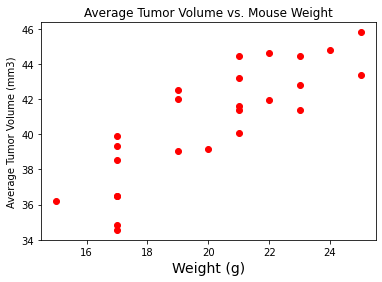

In [32]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

fig1, ax1 = plt.subplots()
avg_capom_volume = Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capom_volume['Weight (g)'],avg_capom_volume['Tumor Volume (mm3)'], color="red")
plt.title('Average Tumor Volume vs. Mouse Weight')
plt.xlabel('Weight (g)', fontsize=14)
plt.ylabel('Average Tumor Volume (mm3)')

In [33]:
# CORRELATION AND REGRESSION
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculate the correlation coefficent for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_capom_volume['Weight (g)'],avg_capom_volume['Tumor Volume (mm3)'])
print(f"The correlation between the mouse weight and the average tumor volume is {round(correlation[0], 2)}")


The correlation between the mouse weight and the average tumor volume is 0.84


The r-squared is: 0.709


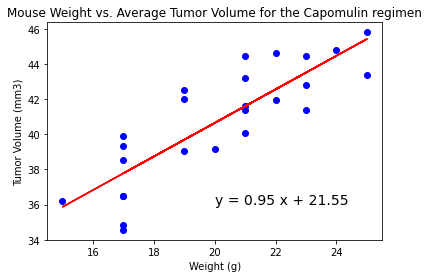

In [34]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Equation for Linear regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_capom_volume["Weight (g)"], avg_capom_volume["Tumor Volume (mm3)"])
regression_values = avg_capom_volume["Weight (g)"]* slope + intercept
line_equation = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

#Plot the linear regression
plt.scatter(avg_capom_volume["Weight (g)"],avg_capom_volume["Tumor Volume (mm3)"],color='b')
plt.plot(avg_capom_volume["Weight (g)"], regression_values, color='red')
plt.annotate(line_equation, (20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for the Capomulin regimen")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()